# Import Required Libraries
Import the necessary libraries, including pandas, sklearn, and lazypredict.

In [ ]:
# install needed library
!pip install lazypredict

In [ ]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score

# Load CSV Files as DataFrames

Load CSV files into pandas DataFrames.

In [ ]:
# Load CSV files as DataFrames
Features = pd.read_csv("/content/Al_Spectre.csv", header=None , index_col=False)
Targets = pd.read_csv("/content/CRM-ELEMISSION-Maroc-1.csv")

In [ ]:
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,3004,3004,3004,3005,3005,3005,3105,3105,3105,5454,...,6061,6351,6351,6351,1063,1063,1063,413,413,413
1,179,179,86,88,132,133,126,156,82,104,...,160,137,127,134,60,14,0,97,88,167
2,182,184,92,92,140,137,133,159,88,108,...,167,141,133,138,64,19,6,102,94,171
3,184,186,97,96,142,142,136,160,90,115,...,170,148,138,139,68,25,8,105,98,176
4,191,189,101,100,146,147,139,164,96,121,...,177,152,146,142,71,34,15,111,101,185


In [ ]:
Targets.head()

,Stdname,Certifié le,Inventaire,Débit / an,Tri,REMARQUE,Tiers,Prix,Type,Statut,...,Zr,Sb,P,K,SiC,Hg,As,Ba,Mo,Tl
0,413,06/10/1994,33,17.00,1,NaN,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6061,10/17/2000,499,NaN,0,standard de contrôle de qualité,N,150,D,NaN,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3005,05/06/1993,49,10.00,1,NaN,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3105,04/20/1994,200,26.00,1,NaN,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6111,06/21/1995,417,3.00,1,recu le 4-11-94,N,200,D,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning and Preparation
Clean and prepare the data for analysis, including transposing and renaming columns.

In [ ]:
# Data Cleaning and Preparation
# Transpose the DataFrame Features
df1 = Features.transpose()
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,3004,179,182,184,191,199,204,208,211,213,...,818,809,808,804,798,796,796,794,791,796
1,3004,179,184,186,189,194,204,210,207,205,...,830,823,823,819,812,808,808,809,807,804
2,3004,86,92,97,101,104,112,116,113,116,...,831,824,820,812,803,805,803,798,799,801
3,3005,88,92,96,100,105,112,115,116,121,...,822,816,813,806,797,795,790,790,791,793
4,3005,132,140,142,146,153,158,158,160,163,...,817,809,806,802,796,794,792,792,796,796


In [ ]:
# Rename the Stdname column
df1 = df1.rename(columns={0: 'Stdname'})
df1.head()

,Stdname,1,2,3,4,5,6,7,8,9,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,3004,179,182,184,191,199,204,208,211,213,...,818,809,808,804,798,796,796,794,791,796
1,3004,179,184,186,189,194,204,210,207,205,...,830,823,823,819,812,808,808,809,807,804
2,3004,86,92,97,101,104,112,116,113,116,...,831,824,820,812,803,805,803,798,799,801
3,3005,88,92,96,100,105,112,115,116,121,...,822,816,813,806,797,795,790,790,791,793
4,3005,132,140,142,146,153,158,158,160,163,...,817,809,806,802,796,794,792,792,796,796


In [ ]:
#Change data of Stdname to integer type
df1['Stdname'] = df1['Stdname'].astype(int)

In [ ]:
#Select only the “Stdname” and “Mg” columns in the Targets DataFrame
df2 = Targets[['Stdname','Mg']]
df2.head()

,Stdname,Mg
0,413,0.00
1,6061,0.98
2,3005,0.45
3,3105,0.50
4,6111,0.77


In [ ]:
# Merge the two dataframes features and targets using the specified column Stdname as key
resultat = pd.merge(df1, df2, on='Stdname')
resultat.drop('Stdname' ,axis=1, inplace=True)
resultat.head()

,1,2,3,4,5,6,7,8,9,10,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Mg
0,179,182,184,191,199,204,208,211,213,217,...,809,808,804,798,796,796,794,791,796,1.26
1,179,184,186,189,194,204,210,207,205,207,...,823,823,819,812,808,808,809,807,804,1.26
2,86,92,97,101,104,112,116,113,116,119,...,824,820,812,803,805,803,798,799,801,1.26
3,88,92,96,100,105,112,115,116,121,125,...,816,813,806,797,795,790,790,791,793,0.45
4,132,140,142,146,153,158,158,160,163,166,...,809,806,802,796,794,792,792,796,796,0.45


# Training the model


In [ ]:
# Split data into features X and target variable Y
X = resultat.drop('Mg', inplace=False, axis=1)
Y = resultat['Mg']

# Split the dataSet into train part and test part
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#Selection Models
Choose the best Regression Models.




In [ ]:
# use LazyRegressor to compare regression models
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

In [ ]:
# Print the performance of all the models
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SGDRegressor,203530400080863495716864.00,-102375791240674344452489216.00,3168368757877.71,0.14
Lars,240605205761683259392.00,-121024418498126697988096.00,108936542905.73,0.42
DecisionTreeRegressor,1.02,-9.02,0.99,0.11
PassiveAggressiveRegressor,1.02,-6.64,0.87,0.11
KernelRidge,1.01,-6.38,0.85,0.08
GaussianProcessRegressor,1.01,-6.25,0.84,0.16
MLPRegressor,1.01,-4.34,0.72,0.28
BaggingRegressor,1.00,-0.51,0.38,0.12
LGBMRegressor,1.00,-0.24,0.35,0.18


# Create and Train LinearSVR Model
Creating our model with LinearSVR.

In [ ]:
# Create and Train LinearSVR Model
model = LinearSVR()
model.fit(x_train, y_train)

LinearSVR()

In [ ]:
# Make Predictions on the Test Set
predictions = model.predict(x_test)

In [ ]:
# Calculate and display the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate and display the R-Squared value
r_squared = r2_score(y_test, predictions)
print("R-Squared:", r_squared)

Mean Squared Error: 0.0013614743585792172
R-Squared: 0.9861153385965242


# Use Another Model
to make the comparison use another regression model PLS-Regression.

In [ ]:
# Importing the necessary library
from sklearn.cross_decomposition import PLSRegression

In [ ]:
# Create and Train RandomForestRegressor Model
model_rf = PLSRegression(n_components=6)
model_rf.fit(x_train, y_train)

PLSRegression(n_components=6)

In [ ]:
# Make Predictions on the Test Set
predictions_rf = model_rf.predict(x_test)

In [ ]:
# Calculate Mean Squared Error (MSE) on the Test Set
mse_rf = mean_squared_error(y_test, predictions_rf)
print("Mean Squared Error (PLSRegression):", mse_rf)

# Calculate R-Squared on the Test Set
r_squared_rf = r2_score(y_test, predictions_rf)
print("R-Squared (PLSRegression):", r_squared_rf)

Mean Squared Error (PLSRegression): 0.013530203099492493
R-Squared (PLSRegression): 0.8620155513227901


### LassoCV

Creating another model with regression LassoCV.


In [ ]:
# Importing the necessary library
from sklearn.linear_model import LassoCV

In [ ]:
# Using LassoCV
reg = LassoCV(cv=5, random_state=0)
reg.fit(x_train , y_train)

LassoCV(cv=5, random_state=0)

In [ ]:
# Make Predictions on the Test Set
predictions_ls = reg.predict(x_test)

In [ ]:
# Calculate Mean Squared Error (MSE) on the Test Set
mse_ls = mean_squared_error(y_test, predictions_ls)
print("Mean Squared Error (LassoCV):", mse_ls)

# Calculate R-Squared on the Test Set
r_squared_ls = r2_score(y_test, predictions_ls)
print("R-Squared (LassoCV):", r_squared_ls)

Mean Squared Error (LassoCV): 0.0006110292101308728
R-Squared (LassoCV): 0.9937685688776733


# Performance visualization of our models
Visualize the model's performance using appropriate plots.

In [ ]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create data system
data_r_square = {'LinearSVR':r_squared , 'PLSRegression': r_squared_rf , 'LassoCV' : r_squared_ls}
data_mse = {'LinearSVR':mse , 'PLSRegression': mse_rf , 'LassoCV' : mse_ls}

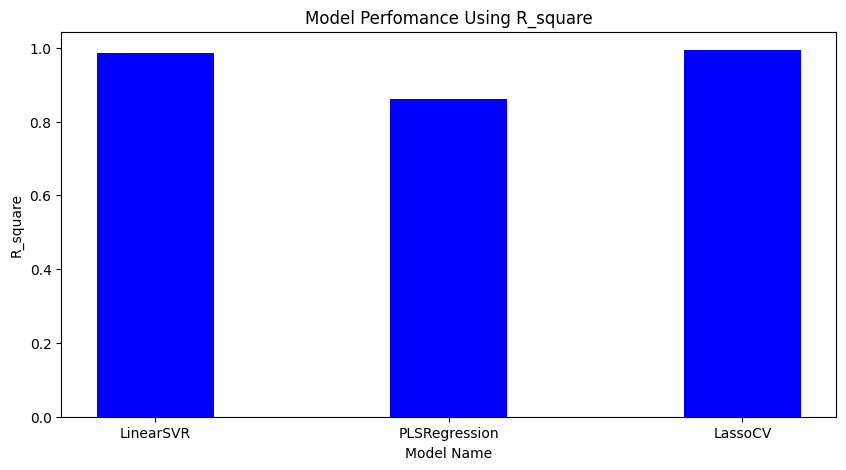

In [ ]:
#visualize the R_square performance metrics of different models.
plt.figure(figsize = (10, 5))
plt.bar(list(data_r_square.keys()), list(data_r_square.values()), color ='Blue', width = 0.4)
plt.xlabel("Model Name")
plt.ylabel("R_square")
plt.title("Model Perfomance Using R_square")
plt.show()

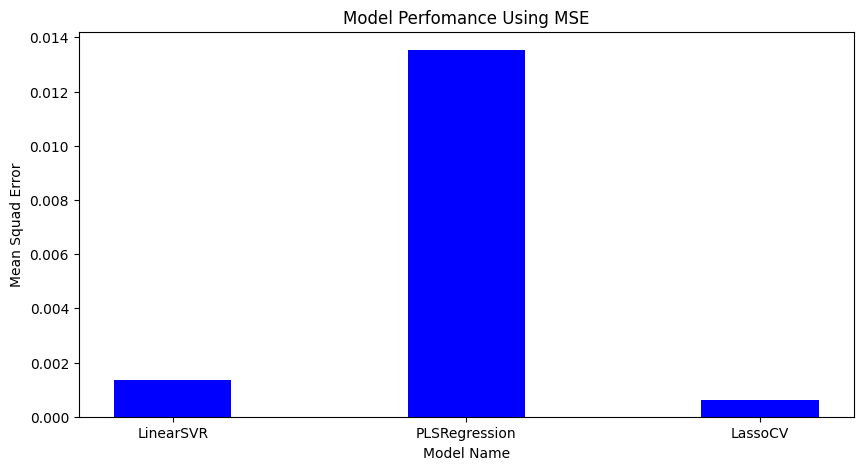

In [ ]:
#visualize the MSE performance metrics of different models.
plt.figure(figsize = (10, 5))
plt.bar(list(data_mse.keys()), list(data_mse.values()), color ='Blue', width = 0.4)
plt.xlabel("Model Name")
plt.ylabel("Mean Squad Error")
plt.title("Model Perfomance Using MSE")
plt.show()